<a href="https://colab.research.google.com/github/fugugdeveloper/YOLOv8-Brain-Tumor-Segmentation/blob/master/segmentationwithyoyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

import ultralytics
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
ultralytics.checks()
%cd '/content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset'

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 41.3/225.8 GB disk)
/content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset


In [2]:
# Load a model
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="data.yaml", epochs=30, imgsz=640)

Ultralytics 8.3.145 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, 

100%|██████████| 4.23M/4.23M [00:00<00:00, 13.2MB/s]
Unzipping /content/datasets/brain-tumor.zip to /content/datasets/brain-tumor...: 100%|██████████| 2225/2225 [00:00<00:00, 6001.07file/s]

Dataset download success ✅ (2.9s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 3.38MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256,

train: Scanning /content/datasets/brain-tumor/train/labels... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<00:00, 1029.20it/s]

train: New cache created: /content/datasets/brain-tumor/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 145.6±116.1 MB/s, size: 3.4 KB)


val: Scanning /content/datasets/brain-tumor/valid/labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 918.70it/s]

val: New cache created: /content/datasets/brain-tumor/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.311      3.339      1.216         18        640: 100%|██████████| 56/56 [03:35<00:00,  3.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:26<00:00,  3.79s/it]

                   all        223        241    0.00163       0.42      0.072      0.047



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.266      2.391      1.164         26        640: 100%|██████████| 56/56 [03:58<00:00,  4.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:26<00:00,  3.78s/it]

                   all        223        241      0.447      0.625      0.448      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.262        2.1      1.168         24        640: 100%|██████████| 56/56 [03:38<00:00,  3.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:20<00:00,  2.97s/it]

                   all        223        241       0.41      0.374      0.331      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.243      1.889      1.155         24        640: 100%|██████████| 56/56 [03:36<00:00,  3.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:07<00:17,  3.53s/it]


KeyboardInterrupt: 


image 1/1 /content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset/valid/images/val_1 (199).jpg: 640x640 1 vase, 201.4ms
Speed: 5.8ms preprocess, 201.4ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4


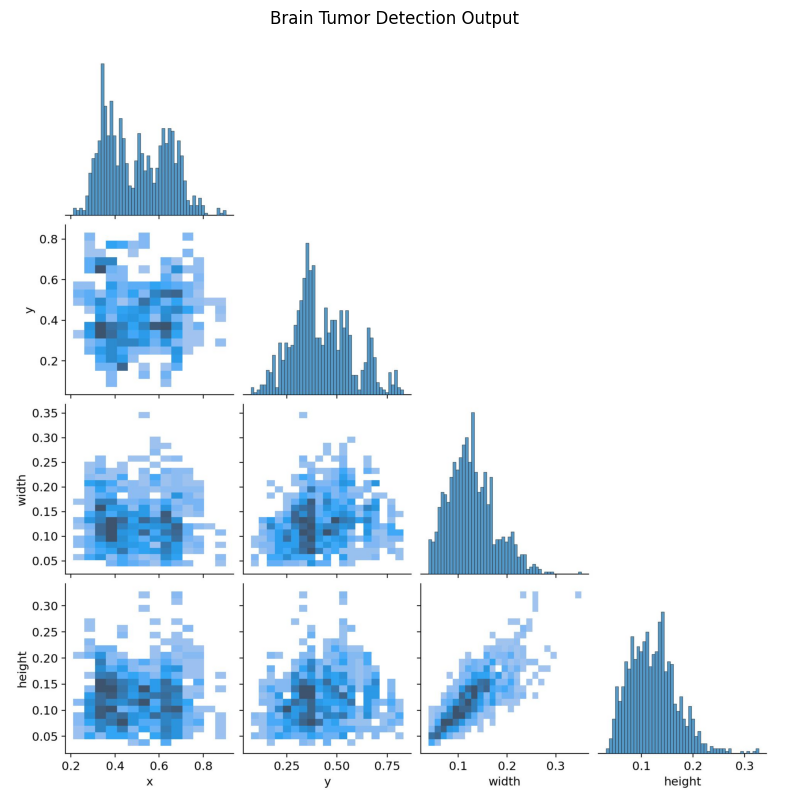

In [3]:
# Load a model
model = YOLO("/content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset/yolo11n.pt")  # load a fine-tuned model

# Inference using the model (img/video/stream)
results = model.predict(source="/content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset/valid/images/val_1 (199).jpg", save=True, imgsz=640)

import os
from glob import glob
import matplotlib.pyplot as plt
import cv2

# Automatically find saved image
result_dir = sorted(glob("runs/detect/*"))[-1]
result_img = glob(os.path.join(result_dir, "*.jpg"))[0]

# Show using matplotlib
img = cv2.imread(result_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.title("Brain Tumor Detection Output")
plt.show()

In [4]:
import re

base_path = "/content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset/runs/detect"
folders = [f for f in os.listdir(base_path) if re.match(r"predict\d*", f)]
folders = sorted(folders, key=lambda x: int(x.replace("predict", "") or 0))
latest_folder = os.path.join(base_path, folders[-1])
print("Latest prediction folder:", latest_folder)



Latest prediction folder: /content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset/runs/detect/predict4


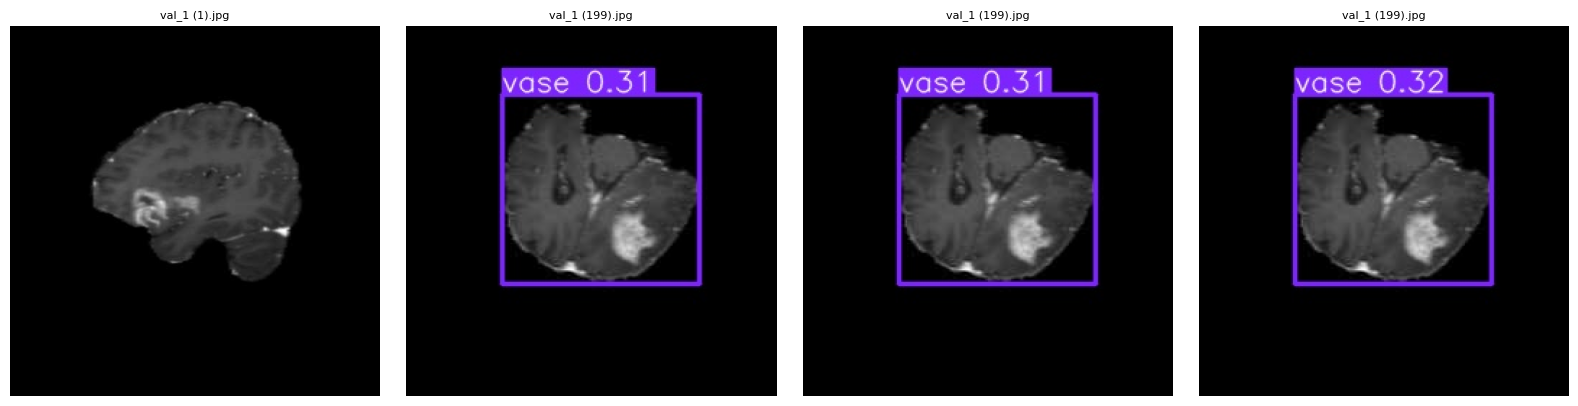

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import math
import re

# Base path where predictions are saved
base_path = "/content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset/runs/detect"

# Collect all predict folders
predict_folders = sorted(
    [f for f in os.listdir(base_path) if re.match(r"predict\d*", f)],
    key=lambda x: int(x.replace("predict", "") or 0)
)

# Collect all image paths
image_paths = []
for folder in predict_folders:
    full_folder_path = os.path.join(base_path, folder)
    for file in os.listdir(full_folder_path):
        if file.lower().endswith(".jpg"):
            image_paths.append(os.path.join(full_folder_path, file))

# Grid layout
cols = 4  # Number of columns in the grid
rows = math.ceil(len(image_paths) / cols)

# Display all collected images in a grid
plt.figure(figsize=(cols * 4, rows * 4))

for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path), fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


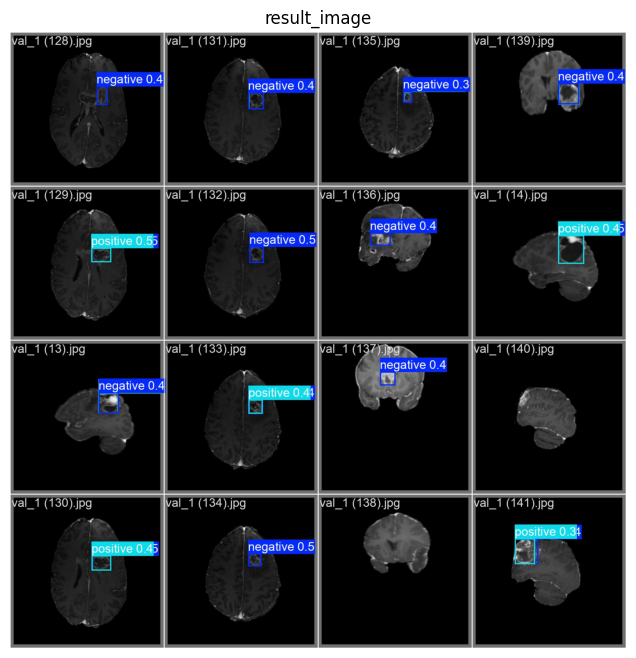

In [10]:
import cv2
import matplotlib.pyplot as plt

# Path to the image
img_path = "/content/drive/MyDrive/Colab Notebooks/Yoyo11Segmentation/dataset/runs/detect/train/val_batch1_pred.jpg"

# Read and convert the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title("result_image")
plt.axis("off")
plt.show()
